In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt


CDHWdata_1.csvbirthDeath0.csv
Top persistent homologies of 1 and dimension H0
    persitence              vector
13        2.87   + 1 * {      21 }
0         2.67   + 1 * {       1 }
7         2.47   + 1 * {      16 }
5         2.46   + 1 * {      14 }
1         2.40   + 1 * {      10 }
9         2.27   + 1 * {      18 }
8         2.25   + 1 * {      17 }
12        2.24   + 1 * {      20 }
15        2.16   + 1 * {      23 }
6         2.14   + 1 * {      15 }
CDHWdata_1.csvbirthDeath1.csv
Top persistent homologies of 1 and dimension H1
     persitence                                                                                                                                                                                                                                                              vector
101        0.21  -1 * {      35       59 } + 1 * {      36       38 }-1 * {      39       41 }-1 * {      41        7 }-1 * {      60       91 } + 1 * {      62       90 } + 1 * {    

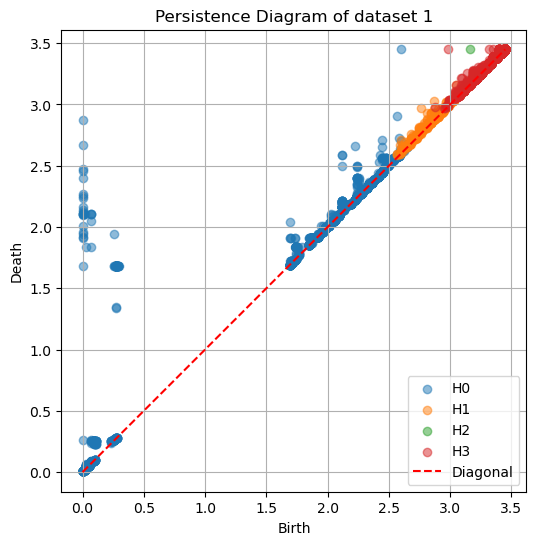

CDHWdata_2.csvbirthDeath1.csv
Top persistent homologies of 2 and dimension H1
    persitence                     vector
0         0.12  -1 * {      43       44 }
31        0.11  -1 * {      86       92 }
25        0.11   1 * {      41       74 }
4         0.08   1 * {      55       87 }
3         0.07  -1 * {      55       87 }
33        0.07   1 * {      32       64 }
14        0.06  -1 * {       1       31 }
20        0.06   1 * {      19       22 }
18        0.05  -1 * {      64       66 }
24        0.05  -1 * {      15       20 }
CDHWdata_2.csvbirthDeath3.csv
Top persistent homologies of 2 and dimension H3
    persitence                                      vector
0         0.08  1 * {      80       83       84       85 }
1         0.05  1 * {      46       47       49       50 }
2         0.04  1 * {      46       49       50       52 }
4         0.04  1 * {      80       83       84       85 }
13        0.03  1 * {      86       88       89       90 }
3         0.03  1 * {      4

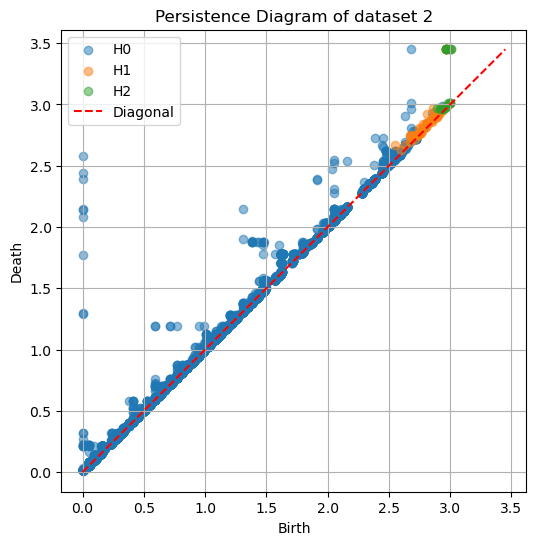

CDHWdata_3.csvbirthDeath1.csv
Top persistent homologies of 3 and dimension H1
   persitence                    vector
1        0.06  1 * {      40       42 }
0        0.05  1 * {      40       42 }
2       -3.55  1 * {      40       42 }
3       -3.58  1 * {      32       34 }
CDHWdata_4.csvbirthDeath0.csv
      birth  death           vector
0      0.00   -1.0  1 * {       1 }
2      0.00   -1.0  1 * {      11 }
3      0.00   -1.0  1 * {      12 }
4      0.00   -1.0  1 * {      13 }
5      0.00   -1.0  1 * {      14 }
6      0.00   -1.0  1 * {      15 }
341    0.19   -1.0  1 * {       1 }
901    2.25   -1.0  1 * {       4 }
1147   2.33   -1.0  1 * {      51 }
1181   2.35   -1.0  1 * {      54 }
1213   2.36   -1.0  1 * {      55 }
1313   2.40   -1.0  1 * {      66 }
1315   2.40   -1.0  1 * {      68 }
1316   2.40   -1.0  1 * {      69 }
1327   2.40   -1.0  1 * {      89 }
1328   2.40   -1.0  1 * {       9 }
1329   2.40   -1.0  1 * {      90 }
1331   2.40   -1.0  1 * {      93 }
1373   2

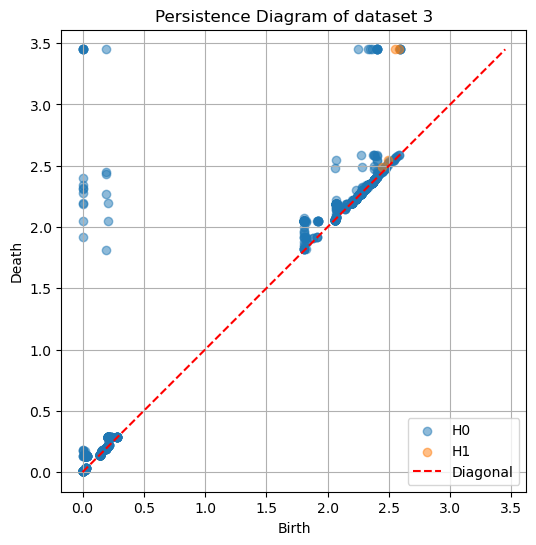

CDHWdata_4.csvbirthDeath1.csv
Top persistent homologies of 4 and dimension H1
    persitence                     vector
1         0.15   0 * {       1       27 }
4         0.08   0 * {       1       27 }
12        0.07   0 * {       1       27 }
40        0.06  -1 * {      24       58 }
2         0.06   0 * {       1       27 }
44        0.06   1 * {      63       91 }
3         0.06   0 * {       1       27 }
46        0.05  -1 * {      43       45 }
13        0.05   0 * {       1       27 }
11        0.05   0 * {       1       27 }
CDHWdata_4.csvbirthDeath3.csv


ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [96]:
myList = os.listdir()
myList.sort()
myFileNum = 0
myPrevFileNum = 0
myMainDf = []
true_max_value = 0
for file in myList:
    if 'birthDeath' in file and 'csv' in file and os.path.getsize(file) > 0:
        myFileNum = file.split('_')[1][0]
        print(file)
        df = pd.read_csv(file, header=None, on_bad_lines='skip')
        df = df.iloc[:, :3]
        df.columns = ['birth', 'death', 'vector']
        max_val = df[['death', 'birth']].max().max()
        if max_val > true_max_value:
            true_max_value = max_val
        if (myFileNum != myPrevFileNum) and myPrevFileNum != 0:
            plt.figure(figsize=(6, 6))
            for i, myDf in enumerate(myMainDf):   
                print(myDf[myDf['death'] == -1])
                myDf = myDf.replace(-1, true_max_value) 
                plt.scatter(myDf['birth'], myDf['death'], label=f'H{i}', alpha=0.5)
            plt.plot([0, true_max_value], [0, true_max_value], 'r--', label='Diagonal')

            plt.xlabel('Birth')
            plt.ylabel('Death')
            plt.title(f'Persistence Diagram of dataset {myPrevFileNum}')
            plt.legend()
            plt.grid(True)
            plt.axis('equal')
            plt.show()
            myMainDf = [df]
        else:
            myMainDf.append(df)
            print(f'Top persistent homologies of {myFileNum} and dimension H{file[-5]}')
            df['persitence'] = df['death'] - df['birth']
            df = df.sort_values(by='persitence', ascending=False)
            print(df[['persitence', 'vector']].head(10).to_string())
        myPrevFileNum = myFileNum
    else:
        myMainDf.append(pd.DataFrame())
if (myFileNum != myPrevFileNum) and myPrevFileNum != 0:
    plt.figure(figsize=(6, 6))
    for myDf in myMainDf:   
        print(myDf[myDf['death'] == -1])
        myDf = myDf.replace(-1, true_max_value) 
        plt.scatter(myDf['birth'], myDf['death'], label=f'H{file[-5]}', alpha=0.5)
    plt.plot([0, true_max_value], [0, true_max_value], 'r--', label='Diagonal')

    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(f'Persistence Diagram of dataset {myPrevFileNum}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()